In [1]:
import cv2
import mmcv
from mmcv.transforms import Compose
from mmengine.utils import track_iter_progress
from mmdet.registry import VISUALIZERS
from mmdet.utils import register_all_modules
from mmdet.apis import init_detector, inference_detector

In [2]:
# Register all modules in mmdet into the registries
register_all_modules()

In [3]:
# Specify the path to model config and checkpoint file
config_file = '/home/amakacs1/mmdetection/configs/faster_rcnn/faster-rcnn_r50_fpn_1x_coco.py'
checkpoint_file = '/home/amakacs1/mmdetection/test_folder/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth'

In [4]:
# Build the model from a config file and a checkpoint file
model = init_detector(config_file, checkpoint_file, device='cuda:0')

picsafej:  {'type': 'CrossEntropyLoss', 'use_sigmoid': False, 'loss_weight': 1.0}
loss_cls:  {'type': 'CrossEntropyLoss', 'use_sigmoid': False, 'loss_weight': 1.0}
Loads checkpoint by local backend from path: /home/amakacs1/mmdetection/test_folder/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth


In [5]:
# Init visualizer
visualizer = VISUALIZERS.build(model.cfg.visualizer)
# The dataset_meta is loaded from the checkpoint and
# then pass to the model in init_detector
visualizer.dataset_meta = model.dataset_meta
# Ttest a single image and show the results

/home/amakacs1/.conda/envs/mmcv_3/lib/python3.9/site-packages/mmengine/visualization/visualizer.py:196: UserWarning: Failed to add <class 'mmengine.visualization.vis_backend.LocalVisBackend'>, please provide the `save_dir` argument.
  warnings.warn(f'Failed to add {vis_backend.__class__}, '


In [16]:
# img = '../../../../projects/0/prjs0957/data/COCO/val2017/'  # or img = mmcv.imread(img), which will only load it once
img = mmcv.imread('/gpfs/work5/0/prjs0957/data/COCO/val2017/000000434297.jpg')
result = inference_detector(model, img)

BBox_Head - _predict_by_feat_single - NO custom_cls_channels


In [17]:
# Show the results
img = mmcv.imread(img)
img = mmcv.imconvert(img, 'bgr', 'rgb')

In [18]:
# img

In [19]:
visualizer.add_datasample(
    'result',
    img,
    data_sample=result,
    draw_gt=False,
    show=True)

/home/amakacs1/.conda/envs/mmcv_3/lib/python3.9/site-packages/mmengine/visualization/visualizer.py:760: UserWarning: Warning: The bbox is out of bounds, the drawn bbox may not be in the image
  warnings.warn(
/home/amakacs1/.conda/envs/mmcv_3/lib/python3.9/site-packages/mmengine/visualization/visualizer.py:831: UserWarning: Warning: The polygon is out of bounds, the drawn polygon may not be in the image
  warnings.warn(


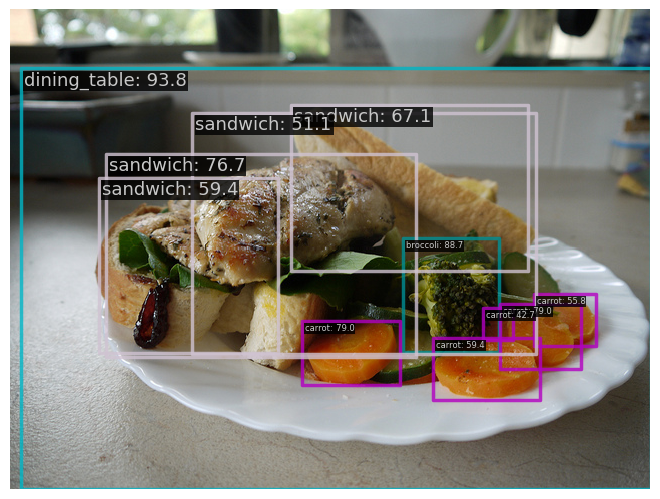

In [20]:
visualizer.show()

In [10]:
frame = visualizer.get_image()

In [12]:
frame

array([[[187, 219, 196],
        [188, 220, 197],
        [190, 219, 197],
        ...,
        [205,  37,  60],
        [205,  37,  60],
        [205,  37,  60]],

       [[187, 219, 196],
        [190, 219, 197],
        [190, 219, 197],
        ...,
        [163,  89,  63],
        [171,  75,  60],
        [205,  36,  60]],

       [[190, 219, 197],
        [190, 219, 197],
        [190, 219, 197],
        ...,
        [151, 104,  62],
        [162,  88,  61],
        [205,  36,  60]],

       ...,

       [[219, 160, 108],
        [ 78, 173, 166],
        [ 44, 177, 180],
        ...,
        [183,  16,  50],
        [190,  17,  51],
        [210,  18,  57]],

       [[221, 160, 106],
        [216, 159, 106],
        [184, 163, 121],
        ...,
        [210,  18,  57],
        [210,  18,  57],
        [210,  18,  57]],

       [[222, 161, 107],
        [221, 160, 106],
        [222, 161, 107],
        ...,
        [210,  19,  57],
        [210,  19,  57],
        [210,  19,  57]]

In [11]:
mmcv.imshow(frame)

error: OpenCV(4.9.0) /io/opencv/modules/highgui/src/window.cpp:1272: error: (-2:Unspecified error) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Cocoa support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function 'cvShowImage'
